In [2]:
import csv
import numpy as np

In [3]:
fields = ['timestamp','torque_on','target_axis0','target_axis1','velocity_limit_A','velocity_limit_B','torque_limit_A','torque_limit_B']

In [4]:
#let's generate a simple sinus on yaw for 5s at 1kHz the very inneficient way

In [7]:
def generate_rpy(timestamp, axis0, axis1, torque=True,vel_limit_A=1.0, vel_limit_B=1.0, torque_limit_A=1.0,torque_limit_B=1.0):
        #the velocity and torque limits are in 100% of the maximum allowed
        return [timestamp, torque, axis0, axis1, vel_limit_A, vel_limit_B, torque_limit_A, torque_limit_B]


In [8]:
AMP=np.radians(20.0) #amplitude of 20°
FREQ=1.0 #frequency of 1Hz

#the created file will be located where you launched jupyter
with open('test_sinus_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=it/1000.0,axis0=np.sin(2.0*np.pi*FREQ*it/1000.0),axis1=0.0))

In [9]:
#let's generate a step, 0° until t=STEP_TIME then yaw=AMP
AMP=np.radians(20.0) #amplitude of 20°
STEP_TIME=1.0 #step will be on from 1s

#the created file will be located where you launched jupyter
with open('test_step_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=it/1000.0,axis0=(AMP if it/1000.0>=STEP_TIME else 0.0),axis1=0.0))

In [10]:
#To plot a csv
import matplotlib.pyplot as plt
import pandas as pd


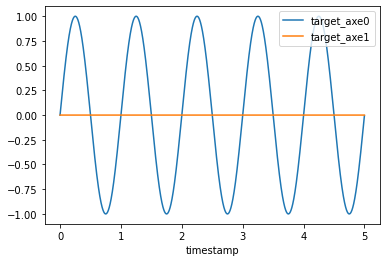

In [11]:
df = pd.read_csv('test_sinus_input.csv')
df.plot(x='timestamp', y=['target_axis0','target_axis1'])
plt.show()
